In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv('../data/shipping_data.csv')
print(df.head())
print(df.info())

                          name  price ($)  weight (kg)  length (m)  width (m)  \
0                   Camera Bag      37.66         1.10        0.40       0.39   
1  Portable Bluetooth Keyboard     144.65         0.39        0.11       0.06   
2          Large Flat Rate Box      38.57         0.97        0.79       0.55   
3                Ceramic Tiles      10.34         6.22        0.36       0.37   
4                  Garden Hose      21.63         1.18       17.77       0.27   

   height (m) shipment date               destination port  
0        0.26    2023-03-19  Port of Singapore (Singapore)  
1        0.03    2023-03-21    Port of Busan (South Korea)  
2        0.35    2023-03-25        Port of Tianjin (China)  
3        0.02    2023-03-15       Port of Shanghai (China)  
4        0.13    2023-03-25        Port of Tianjin (China)  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263821 entries, 0 to 263820
Data columns (total 8 columns):
 #   Column            Non-Null Count

In [91]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 name                   0
price ($)              0
weight (kg)           13
length (m)           184
width (m)              0
height (m)             0
shipment date       2638
destination port      26
dtype: int64


In [92]:
df['weight (kg)'] = df['weight (kg)'].fillna(df['weight (kg)'].median())

In [93]:
df['length (m)'] = df.groupby('name')['length (m)'].transform(lambda x: x.fillna(x.median()))

In [94]:
df['shipment date'] = df.groupby('destination port')['shipment date'].transform(lambda x: x.fillna(x.mode()[0]))

In [95]:
df = df[df['destination port'].notna()]

In [96]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 name                0
price ($)           0
weight (kg)         0
length (m)          0
width (m)           0
height (m)          0
shipment date       0
destination port    0
dtype: int64


In [97]:
#average price of products grouped by their name
avg_price_by_name = df.groupby("name")["price ($)"].mean()
print(avg_price_by_name)

name
ATV                 2993.173792
Air Conditioner      911.343733
Air Conditioners    1727.546122
Aluminum Sheets       75.262299
Apples                89.212654
                       ...     
Wine Opener           17.306000
Wireless Earbuds     223.707249
Wooden Planks         34.181782
Wristwatch           273.956862
Yoga Mat              30.963603
Name: price ($), Length: 291, dtype: float64


In [98]:
#the total weight of shipments grouped by destination port
total_weight_by_port = df.groupby("destination port")["weight (kg)"].sum()
print(total_weight_by_port)

destination port
Port of Busan (South Korea)      16622094.36
Port of Shanghai (China)         17296587.95
Port of Singapore (Singapore)    16882033.11
Port of Tianjin (China)          17838151.79
Port of Tokyo (Japan)            16875115.37
Name: weight (kg), dtype: float64


In [99]:
#the highest recorded product price
max_price = df["price ($)"].max()
print(f"Max Price: ${max_price}")

Max Price: $1999706.53


In [100]:
#average volume (in cubic meters) for each product
df["volume (m³)"] = df["length (m)"] * df["width (m)"] * df["height (m)"]
avg_volume_by_name = df.groupby("name")["volume (m³)"].mean()
print(avg_volume_by_name)

name
ATV                 3.846432
Air Conditioner     0.080815
Air Conditioners    0.319926
Aluminum Sheets     0.104329
Apples              0.334660
                      ...   
Wine Opener         0.001712
Wireless Earbuds    0.003034
Wooden Planks       0.168469
Wristwatch          0.000894
Yoga Mat            0.046243
Name: volume (m³), Length: 291, dtype: float64


In [101]:
#number of shipments per destination port
shipment_count_by_port = df["destination port"].value_counts()
print(shipment_count_by_port)

destination port
Port of Busan (South Korea)      53157
Port of Tianjin (China)          53111
Port of Tokyo (Japan)            52833
Port of Singapore (Singapore)    52393
Port of Shanghai (China)         52301
Name: count, dtype: int64


In [102]:
#average shipment weight for the year 2023
df["shipment date"] = pd.to_datetime(df["shipment date"])
avg_weight_2023 = df[df["shipment date"].dt.year == 2023]["weight (kg)"].mean()
print(f"Avg Weight in 2023: {avg_weight_2023:.2f} kg")

Avg Weight in 2023: 324.17 kg


In [103]:
#total shipment costs grouped by destination port
total_cost_by_port = df.groupby("destination port")["price ($)"].sum()
print(total_cost_by_port)

destination port
Port of Busan (South Korea)      2.257314e+08
Port of Shanghai (China)         2.068017e+08
Port of Singapore (Singapore)    2.075872e+08
Port of Tianjin (China)          2.466837e+08
Port of Tokyo (Japan)            2.196962e+08
Name: price ($), dtype: float64


In [104]:
#the top 20 most expensive products
top_products_by_price = df.nlargest(20, "price ($)")[["name", "price ($)"]]
print(top_products_by_price)

              name   price ($)
60900   Sports Car  1999706.53
37756   Sports Car  1998160.05
155667  Sports Car  1994427.04
109804  Sports Car  1989497.52
224634  Sports Car  1988565.53
113812  Sports Car  1984590.25
79821   Sports Car  1980576.71
192315  Sports Car  1971771.58
253663  Sports Car  1969944.48
252817  Sports Car  1968706.99
10155   Sports Car  1966898.73
217543  Sports Car  1962889.40
133154  Sports Car  1961450.43
221168  Sports Car  1955179.05
178787  Sports Car  1952194.01
164399  Sports Car  1948010.03
26109   Sports Car  1947126.52
175029  Sports Car  1945931.53
5591    Sports Car  1941250.78
188673  Sports Car  1940081.17


In [105]:
#average product price grouped by destination port
avg_price_by_port = df.groupby("destination port")["price ($)"].mean()
print(avg_price_by_port)

destination port
Port of Busan (South Korea)      4246.503346
Port of Shanghai (China)         3954.066916
Port of Singapore (Singapore)    3962.117639
Port of Tianjin (China)          4644.681991
Port of Tokyo (Japan)            4158.313428
Name: price ($), dtype: float64


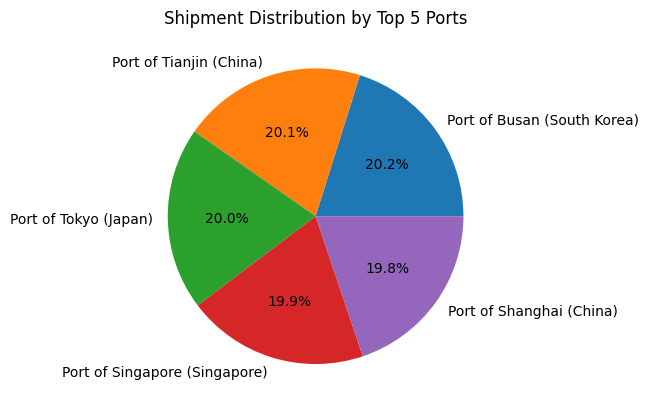

In [106]:
df["destination port"].value_counts().nlargest(5).plot(kind="pie", autopct='%1.1f%%')
plt.title("Shipment Distribution by Top 5 Ports")
plt.ylabel("")
plt.show()

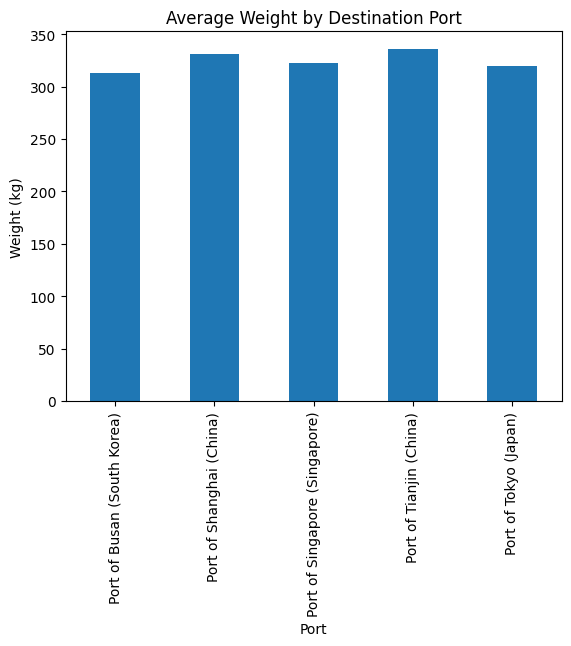

In [107]:
df.groupby("destination port")["weight (kg)"].mean().plot(kind="bar")
plt.title("Average Weight by Destination Port")
plt.xlabel("Port")
plt.ylabel("Weight (kg)")
plt.show()

In [108]:
#number of shipments per month in 2023
monthly_shipments = df[df["shipment date"].dt.year == 2023].groupby(df["shipment date"].dt.month)["name"].count()
print(monthly_shipments)

shipment date
3    263795
Name: name, dtype: int64


In [109]:
#maximum product volume
max_volume = df["volume (m³)"].max()
print(f"Max Volume: {max_volume:.2f} m³")

Max Volume: 937.87 m³


In [110]:
#average shipment price for each month
avg_price_by_month = df.groupby(df["shipment date"].dt.month)["price ($)"].mean()
print(avg_price_by_month)

shipment date
3    4194.545538
Name: price ($), dtype: float64


In [111]:
#total number of shipments grouped by product name
shipment_count_by_name = df["name"].value_counts()
print(shipment_count_by_name)

name
Hiking Boots            2975
Medium Box              2866
Large Box               2862
Coffee Maker            2262
Pallete of Coffee       2242
                        ... 
Tomatoes (Canned)        678
Wine Bottle              672
Pallete of Bird Food     666
Dog Crate                660
Golf Cart                652
Name: count, Length: 291, dtype: int64


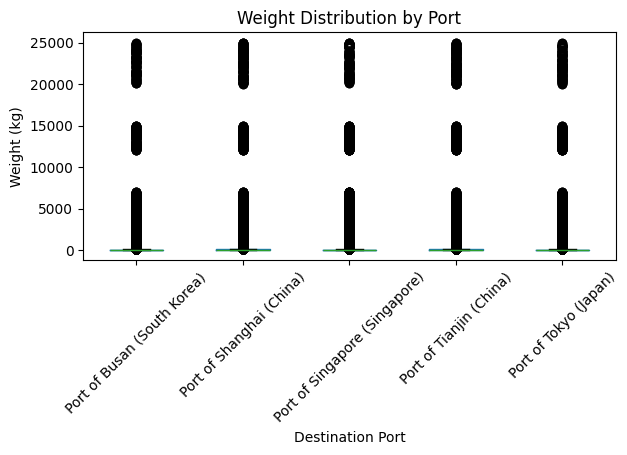

In [112]:
top_ports = df["destination port"].value_counts().nlargest(5).index
df[df["destination port"].isin(top_ports)].boxplot(column="weight (kg)", by="destination port", grid=False)
plt.title("Weight Distribution by Port")
plt.suptitle("")  # Remove the default suptitle
plt.xlabel("Destination Port")
plt.ylabel("Weight (kg)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [113]:
#the top 5 ports based on number of shipments
top_ports_by_shipments = df["destination port"].value_counts().nlargest(5)
print(top_ports_by_shipments)

destination port
Port of Busan (South Korea)      53157
Port of Tianjin (China)          53111
Port of Tokyo (Japan)            52833
Port of Singapore (Singapore)    52393
Port of Shanghai (China)         52301
Name: count, dtype: int64


In [114]:
#average dimensions grouped by destination port
avg_dims_by_port = df.groupby("destination port")[["length (m)", "width (m)", "height (m)"]].mean()
print(avg_dims_by_port)

                               length (m)  width (m)  height (m)
destination port                                                
Port of Busan (South Korea)      0.937537   0.530764    0.462068
Port of Shanghai (China)         0.956301   0.531983    0.460305
Port of Singapore (Singapore)    0.953125   0.527429    0.462709
Port of Tianjin (China)          0.964309   0.532190    0.464002
Port of Tokyo (Japan)            0.958348   0.528739    0.463955


In [115]:
#the total weight for shipments over 5 kg
total_weight_above_5kg = df[df["weight (kg)"] > 5]["weight (kg)"].sum()
print(f"Total Weight > 5kg: {total_weight_above_5kg:.2f} kg")


Total Weight > 5kg: 85338236.49 kg


In [116]:
#average shipment price grouped by product and port
avg_price_by_name_port = df.groupby(["name", "destination port"])["price ($)"].mean()
print(avg_price_by_name_port)

name      destination port             
ATV       Port of Busan (South Korea)      2986.429134
          Port of Shanghai (China)         2985.566340
          Port of Singapore (Singapore)    2841.756406
          Port of Tianjin (China)          3078.083961
          Port of Tokyo (Japan)            3057.714651
                                              ...     
Yoga Mat  Port of Busan (South Korea)        31.571640
          Port of Shanghai (China)           31.028185
          Port of Singapore (Singapore)      31.379773
          Port of Tianjin (China)            30.112215
          Port of Tokyo (Japan)              30.660460
Name: price ($), Length: 1455, dtype: float64


In [117]:
#the daily shipments during March 2023
march_2023 = df[df["shipment date"].dt.strftime('%Y-%m') == '2023-03'].groupby(df["shipment date"].dt.day)["name"].count()
print(march_2023)

shipment date
12    15448
13    15949
14    15448
15    15922
16    15388
17    15256
18    15979
19    15892
20    15227
21    15390
22    15307
23    15457
24    15318
25    15407
26    15107
27    15380
28    15920
Name: name, dtype: int64


In [118]:
#the product with the highest recorded weight
heaviest_product = df.loc[df["weight (kg)"].idxmax(), "name"]
print(f"Heaviest Product: {heaviest_product}")

Heaviest Product: Pallete of Laptops


In [119]:
#average shipment volume grouped by destination port
avg_volume_by_port = df.groupby("destination port")["volume (m³)"].mean()
print(avg_volume_by_port)

destination port
Port of Busan (South Korea)      1.472844
Port of Shanghai (China)         1.507169
Port of Singapore (Singapore)    1.538115
Port of Tianjin (China)          1.735500
Port of Tokyo (Japan)            1.628244
Name: volume (m³), dtype: float64


In [120]:
#the total cost of shipments made in 2023
total_cost_2023 = df[df["shipment date"].dt.year == 2023]["price ($)"].sum()
print(f"Total Cost in 2023: ${total_cost_2023:.2f}")

Total Cost in 2023: $1106500140.11


In [121]:
#the maximum shipment price grouped by port
max_price_by_port = df.groupby("destination port")["price ($)"].max()
print(max_price_by_port)

destination port
Port of Busan (South Korea)      1988565.53
Port of Shanghai (China)         1971771.58
Port of Singapore (Singapore)    1989497.52
Port of Tianjin (China)          1999706.53
Port of Tokyo (Japan)            1998160.05
Name: price ($), dtype: float64


In [122]:
#average daily shipment price in 2023
daily_avg_2023 = df[df["shipment date"].dt.year == 2023].groupby(df["shipment date"].dt.date)["price ($)"].mean()
print(daily_avg_2023)

shipment date
2023-03-12    4727.577698
2023-03-13    3382.530972
2023-03-14    4152.126180
2023-03-15    4094.921207
2023-03-16    3509.983394
2023-03-17    4066.960710
2023-03-18    4063.104598
2023-03-19    4622.741207
2023-03-20    4750.282669
2023-03-21    4226.905122
2023-03-22    3765.285742
2023-03-23    3880.674510
2023-03-24    4032.082252
2023-03-25    3840.633039
2023-03-26    4706.881612
2023-03-27    4749.178814
2023-03-28    4751.525462
Name: price ($), dtype: float64


In [123]:
#how many shipments exceed 0.1 cubic meters in volume
large_shipments = len(df[df["volume (m³)"] > 0.1])
print(f"Number of Shipments > 0.1 m³: {large_shipments}")

Number of Shipments > 0.1 m³: 112748


In [124]:
# Counts the total number of shipments by port for the year 2023
shipments_2023_by_port = df[df["shipment date"].dt.year == 2023]["destination port"].value_counts()
print(shipments_2023_by_port)

destination port
Port of Busan (South Korea)      53157
Port of Tianjin (China)          53111
Port of Tokyo (Japan)            52833
Port of Singapore (Singapore)    52393
Port of Shanghai (China)         52301
Name: count, dtype: int64


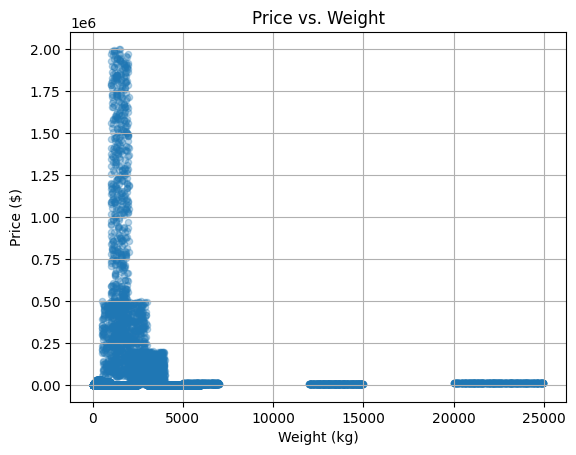

In [125]:
df.plot(kind="scatter", x="weight (kg)", y="price ($)", alpha=0.3)
plt.title("Price vs. Weight")
plt.xlabel("Weight (kg)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

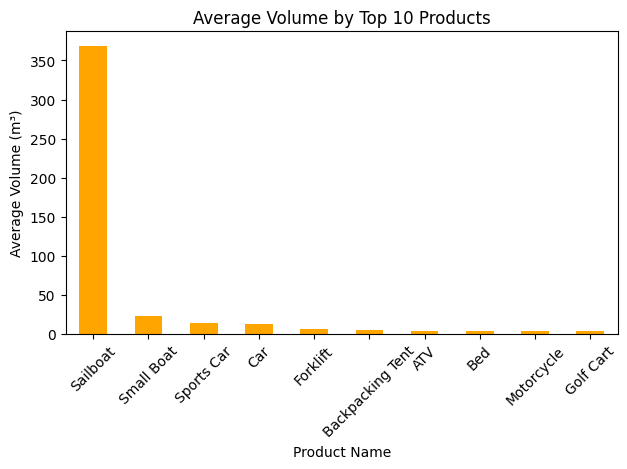

In [126]:
df["volume (m³)"] = df["length (m)"] * df["width (m)"] * df["height (m)"]
avg_volume = df.groupby("name")["volume (m³)"].mean().nlargest(10)
avg_volume.plot(kind="bar", color="orange")
plt.title("Average Volume by Top 10 Products")
plt.xlabel("Product Name")
plt.ylabel("Average Volume (m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

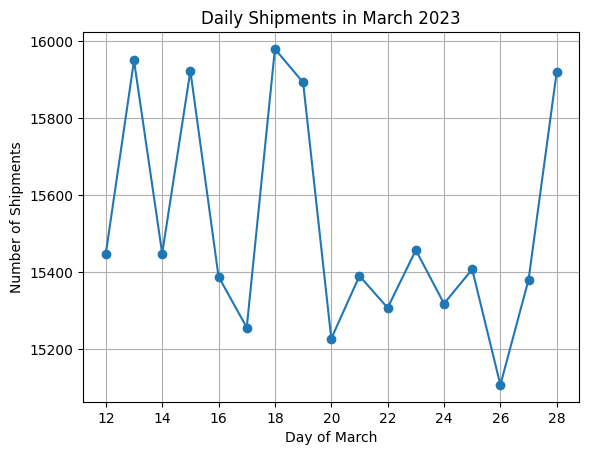

In [127]:
march_data = df[df["shipment date"].dt.strftime('%Y-%m') == '2023-03']
daily_shipments = march_data.groupby(df["shipment date"].dt.day)["name"].count()
daily_shipments.plot(kind="line", marker="o")
plt.title("Daily Shipments in March 2023")
plt.xlabel("Day of March")
plt.ylabel("Number of Shipments")
plt.grid(True)
plt.show()


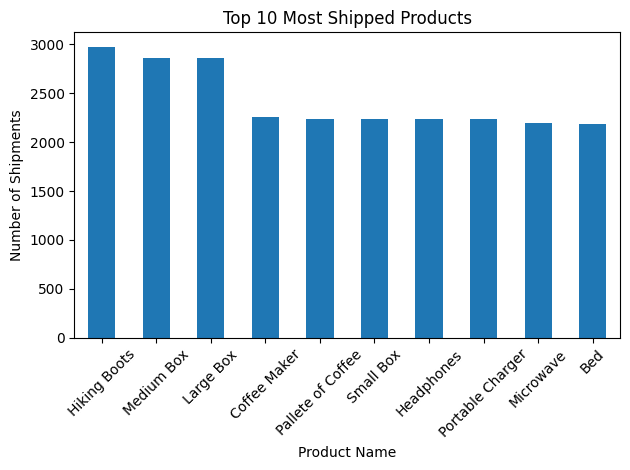

In [128]:
df["name"].value_counts().nlargest(10).plot(kind="bar")
plt.title("Top 10 Most Shipped Products")
plt.xlabel("Product Name")
plt.ylabel("Number of Shipments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()